In [169]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import BernoulliNB as NaiveBayes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import f1_score
from tqdm import tqdm_notebook


In [116]:
imdb_data = pd.read_csv('./imdb_labelled.txt', sep='\t', names=['review', 'label'],
                        converters={'review': str.strip, 'label': int})
imdb_data.head()

,review,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [155]:
print(len(imdb_data[(imdb_data['label'] == 0)]))
print(len(imdb_data[(imdb_data['label'] == 1)]))

#tips[(tips['time'] == 'Dinner') & (tips['tip'] > 5.00)]

362
386


In [162]:
train_inp, test_inp, train_out, test_out =  train_test_split(imdb_data.review, imdb_data.label, test_size=0.2,stratify=imdb_data.label, random_state=20)
#print(len(train_inp))
#print(len(test_inp))

print(sum(test_out==0))
print(sum(test_out==1))

73
77


In [163]:
from sklearn.naive_bayes import BernoulliNB as NaiveBayes
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
classifier = NaiveBayes()

In [170]:
#from sklearn.pipeline import Pipeline

#pipe = Pipeline([
#    ('extractor', vectorizer),
#    ('classifier', classifier)
#])

#pipe.fit(train_inp, train_out)




trains = []
tests = []

for dim in tqdm_notebook(range(1, 100)):
    vectorizer = TfidfVectorizer(stop_words='english')
    svd = TruncatedSVD(dim)
    classifier = NaiveBayes()

    from sklearn.pipeline import Pipeline
    pipe = Pipeline([
        ('extractor', vectorizer),
        ('lsa', svd),
        ('classifier', classifier)
    ])

    pipe.fit(train_inp, train_out)
    trains.append((dim, f1_score(pipe.predict(train_inp), train_out)))
    tests.append((dim, f1_score(pipe.predict(test_inp), test_out)))

HBox(children=(IntProgress(value=0, max=99), HTML(value='')))

In [185]:
tests

[(1, 0.67841409691629961),
 (2, 0.64000000000000001),
 (3, 0.61744966442953009),
 (4, 0.70175438596491224),
 (5, 0.70588235294117641),
 (6, 0.67515923566878977),
 (7, 0.68263473053892221),
 (8, 0.67484662576687127),
 (9, 0.69461077844311392),
 (10, 0.66265060240963847),
 (11, 0.6785714285714286),
 (12, 0.67065868263473061),
 (13, 0.69364161849710981),
 (14, 0.61249999999999993),
 (15, 0.69512195121951215),
 (16, 0.64596273291925466),
 (17, 0.7100591715976331),
 (18, 0.67878787878787872),
 (19, 0.67469879518072295),
 (20, 0.64197530864197538),
 (21, 0.67948717948717963),
 (22, 0.55900621118012428),
 (23, 0.60526315789473673),
 (24, 0.63095238095238104),
 (25, 0.69230769230769229),
 (26, 0.63694267515923564),
 (27, 0.64052287581699352),
 (28, 0.64968152866242035),
 (29, 0.62820512820512819),
 (30, 0.60402684563758391),
 (31, 0.64935064935064934),
 (32, 0.60377358490566035),
 (33, 0.66666666666666663),
 (34, 0.58823529411764708),
 (35, 0.61146496815286622),
 (36, 0.61935483870967745),
 (3

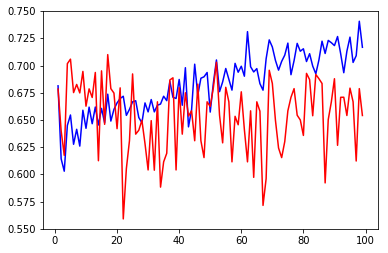

In [184]:
x,y = zip(*trains)
plt.plot(x,y,'b') # plotting t, a separately 
x,y = zip(*tests)
plt.plot(x,y,'r') # plotting t, b separately 
plt.show()
#train_inp_vectorized = vectorizer.fit_transform(train_inp, train_out)
#classifier.fit(train_inp_vectorized, train_out)

In [188]:
trains[0]

(1, 0.68136714443219404)

In [181]:
print(classification_report(pipe.predict(test_inp), test_out))
print(accuracy_score(pipe.predict(test_inp), test_out))


             precision    recall  f1-score   support

          0       0.59      0.63      0.61        68
          1       0.68      0.63      0.65        82

avg / total       0.64      0.63      0.63       150

0.633333333333


In [152]:
print_top10(vectorizer, classifier, 'Positive Review')

Positive Review: time just acting like characters really great good movie film


In [153]:
from sklearn.metrics import confusion_matrix

y_pred = pipe.predict(test_inp)
confusion_matrix(test_out,y_pred)

array([[33, 57],
       [ 2, 58]], dtype=int64)

In [168]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,imdb_data.review, imdb_data.label, cv=5)

array([ 0.77483444,  0.71333333,  0.72483221,  0.67785235,  0.69798658])